# Data description - António

In [2]:
import pandas as pd
import seaborn as sb

data = pd.read_excel('OpArticles/OpArticles.xlsx')
data_ADU = pd.read_excel('OpArticles/OpArticles_ADUs.xlsx')

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


Distribution of value classes in dataset

<AxesSubplot:xlabel='label', ylabel='Count'>

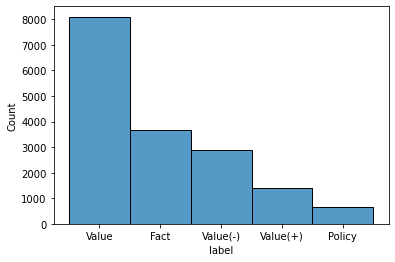

In [4]:
sb.histplot(data_ADU, x="label")

Distribution of annotators

<AxesSubplot:xlabel='annotator', ylabel='Count'>

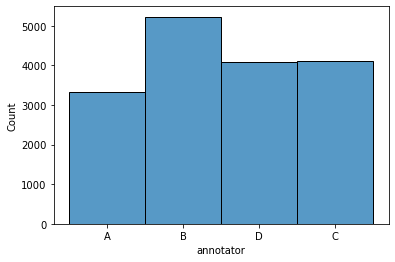

In [5]:
sb.histplot(data_ADU, x="annotator")

Distribution of classes per anotator

<AxesSubplot:xlabel='annotator', ylabel='Count'>

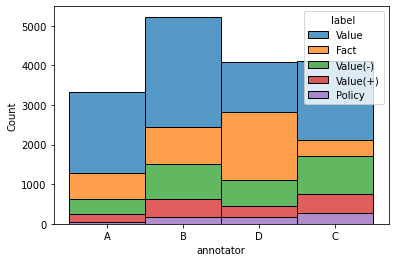

In [8]:
sb.histplot(data_ADU, x="annotator", hue="label", multiple="stack")

<AxesSubplot:xlabel='label', ylabel='Count'>

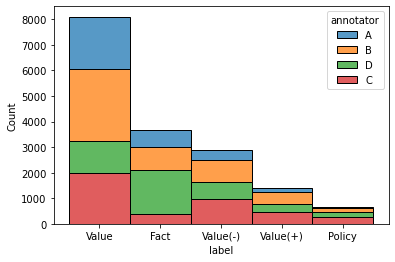

In [40]:
sb.histplot(data_ADU, x="label", hue="annotator", multiple="stack")

Average token length

In [13]:
avg_tk_len = sum(len(tk) for tk in data_ADU["tokens"]) / data_ADU.size

print(f"Average token len: {avg_tk_len:.2f}")

Average token len: 14.85


Most frequent topics

In [37]:
data.groupby(["topics"], as_index=True).agg({"body": "count"}).sort_values("body", ascending=False)


,body
topics,
Sports,52
Local,50
Economy,46
Culture,45
Politics,45
Sci-Tech,45
Society,45
World,45


Arcticles by author

In [39]:
data.groupby(["authors"]).agg({"body": "count"}).sort_values("body", ascending=False)

,body
authors,
[' Alexandra Leitão'],1
['Maria Serrano Correia'],1
['Miguel Anaya'],1
['Michael Hagedorn'],1
['Matt Brittin'],1
...,...
['Gabriel Leite Mota'],1
['Frei Bento Domingues O.P.'],1
['Francisco Teixeira da Mota'],1


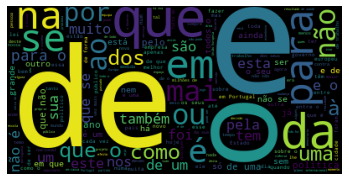

In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wcloud = WordCloud().generate(" ".join(data_ADU["tokens"]))
plt.figure()
plt.imshow(wcloud)
plt.axis('off')
plt.show()

As can be seen, a lot of the words are useless. So let's clean the data up a bit. Let's start by removing stopwords and non alphabetical characters.

In [5]:
from nltk.corpus import stopwords

stp = stopwords.words("portuguese")
print(sorted(stp))

['a', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as', 'até', 'com', 'como', 'da', 'das', 'de', 'dela', 'delas', 'dele', 'deles', 'depois', 'do', 'dos', 'e', 'ela', 'elas', 'ele', 'eles', 'em', 'entre', 'era', 'eram', 'essa', 'essas', 'esse', 'esses', 'esta', 'estamos', 'estas', 'estava', 'estavam', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estivéramos', 'estivéssemos', 'estou', 'está', 'estávamos', 'estão', 'eu', 'foi', 'fomos', 'for', 'fora', 'foram', 'forem', 'formos', 'fosse', 'fossem', 'fui', 'fôramos', 'fôssemos', 'haja', 'hajam', 'hajamos', 'havemos', 'hei', 'houve', 'houvemos', 'houver', 'houvera', 'houveram', 'houverei', 'houverem', 'houveremos', 'houveria', 'houveriam', 'houvermos', 'houverá', 'houverão', 'houveríamos', 'houvesse', 'houvessem', 'houvéramos', 'houvéssemos', 'há', 'hão', 'isso', 'isto', 'já', 'lhe', 'lhes', '

In [ ]:
import re

clean_tokens = []
for token in data_ADU["tokens"]:
    c_tk = re.sub('[^a-zA-Z\u00C0-\u00ff]', ' ', token.lower())
    c_tk = " ".join(w for w in c_tk.split() if w == "não" or w not in stp)
    clean_tokens.append(c_tk)

print(clean_tokens)

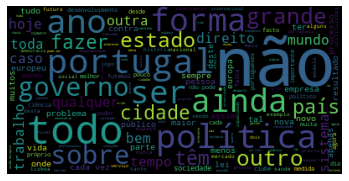

In [27]:
clean_wcloud = WordCloud().generate(" ".join(clean_tokens))
plt.figure()
plt.imshow(clean_wcloud)
plt.axis('off')
plt.show()

In [ ]:
from nltk.stem import RSLPStemmer

stemmer = RSLPStemmer()
stemmed_tokens = [" ".join(stemmer.stem(w) for w in tk.split()) for tk in clean_tokens]

